# Import modules and files

In [1]:
import os

In [2]:
os.chdir(r'C:\Users\davme\Documents\Università Bocconi\DSBA\Visiting Students Initiative\Social contact data')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
contacts = pd.read_csv(r'2011_Horby_Vietnam_contact_common.csv')
participants = pd.read_csv(r'2011_Horby_Vietnam_participant_common.csv')
hh = pd.read_csv(r'2011_Horby_Vietnam_hh_common.csv')

# Preliminary work on the datasets

In [5]:
contacts

part_id      cont_id  cnt_age_exact  cnt_age_est_min  cnt_age_est_max  \
0     H002/S01   H002/S01_2            NaN              NaN              NaN   
1     H002/S01   H002/S01_3            NaN              NaN              NaN   
2     H002/S01   H002/S01_4            NaN              NaN              NaN   
3     H002/S01   H002/S01_1            NaN              NaN              NaN   
4     H002/S01   H002/S01_6            NaN              NaN              NaN   
...        ...          ...            ...              ...              ...   
6670  H325/S02   H325/S02_1            NaN              NaN              NaN   
6671  H325/S02   H325/S02_7            NaN              NaN              NaN   
6672  H325/S02   H325/S02_8            NaN              NaN              NaN   
6673  H325/S02   H325/S02_9            NaN              NaN              NaN   
6674  H325/S02  H325/S02_10            NaN              NaN              NaN   

     cnt_gender cnt_age_group  cnt_home  cnt_work  cnt_school  cnt_transport  \
0             M         16-25      True     False       False          False   
1             F         16-25      True     False       False          False   
2             F         16-25      True     False       False          False   
3             F         35-49      True     False       False          False   
4             M         35-49     False     False       False          False   
...         ...           ...       ...       ...         ...            ...   
6670          M           65+      True     False       False          False   
6671          M           65+     False     False       False           True   
6672          F           65+     False     False       False           True   
6673          F           65+     False     False       False          False   
6674          F           65+     False     False       False          False   

      cnt_leisure  cnt_otherplace  frequency_multi  phys_contact  \
0           False           False              1.0           1.0   
1           False           False              1.0           1.0   
2           False           False              1.0           1.0   
3           False           False              1.0           1.0   
4           False            True              2.0           2.0   
...           ...             ...              ...           ...   
6670        False           False              1.0           1.0   
6671        False           False              2.0           2.0   
6672        False           False              2.0           2.0   
6673         True           False              2.0           2.0   
6674         True           False              2.0           NaN   

      duration_multi  
0                5.0  
1                5.0  
2                5.0  
3                5.0  
4                3.0  
...              ...  
6670             5.0  
6671             2.0  
6672             3.0  
6673             2.0  
6674             3.0  

[6675 rows x 16 columns]

In [6]:
contacts.drop(['cnt_age_exact', 'cnt_age_est_min', 'cnt_age_est_max'], axis = 1, inplace = True)

In [7]:
contacts[contacts.isna().any(axis = 1)]

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
6     H002/S01   H002/S01_9          F         35-49     False     False   
37    H002/S04   H002/S04_3          M         16-25      True     False   
38    H002/S04   H002/S04_4          F         16-25      True     False   
67    H003/S02   H003/S02_2          M         16-25      True     False   
88    H004/S01   H004/S01_5          F         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6652  H321/S03  H321/S03_13          F          6-15     False     False   
6653  H321/S03  H321/S03_14          M          6-15     False     False   
6654  H321/S03  H321/S03_15          F          6-15     False     False   
6655  H321/S03   H321/S03_5          F           65+      True     False   
6674  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
6          False          False        False            True              1.0   
37         False          False        False           False              1.0   
38         False          False        False           False              1.0   
67         False          False        False           False              1.0   
88         False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6652        True          False        False           False              1.0   
6653        True          False        False           False              1.0   
6654        True          False        False           False              1.0   
6655       False          False        False           False              1.0   
6674       False          False         True           False              2.0   

      phys_contact  duration_multi  
6              NaN             3.0  
37             NaN             5.0  
38             NaN             5.0  
67             1.0             NaN  
88             NaN             3.0  
...            ...             ...  
6652           NaN             5.0  
6653           NaN             5.0  
6654           NaN             5.0  
6655           NaN             5.0  
6674           NaN             3.0  

[817 rows x 13 columns]

In [8]:
contacts[contacts.cnt_gender.isna()]

Empty DataFrame
Columns: [part_id, cont_id, cnt_gender, cnt_age_group, cnt_home, cnt_work, cnt_school, cnt_transport, cnt_leisure, cnt_otherplace, frequency_multi, phys_contact, duration_multi]
Index: []

In [9]:
contacts[contacts.cnt_age_group.isna()]

Empty DataFrame
Columns: [part_id, cont_id, cnt_gender, cnt_age_group, cnt_home, cnt_work, cnt_school, cnt_transport, cnt_leisure, cnt_otherplace, frequency_multi, phys_contact, duration_multi]
Index: []

In [10]:
contacts[contacts[['cnt_home', 'cnt_work', 'cnt_school', 'cnt_transport', 'cnt_leisure', 'cnt_otherplace']].isna().any(axis = 1)]

Empty DataFrame
Columns: [part_id, cont_id, cnt_gender, cnt_age_group, cnt_home, cnt_work, cnt_school, cnt_transport, cnt_leisure, cnt_otherplace, frequency_multi, phys_contact, duration_multi]
Index: []

In [11]:
contacts   # nan only in frequency, phys_contact, duration

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01   H002/S01_2          M         16-25      True     False   
1     H002/S01   H002/S01_3          F         16-25      True     False   
2     H002/S01   H002/S01_4          F         16-25      True     False   
3     H002/S01   H002/S01_1          F         35-49      True     False   
4     H002/S01   H002/S01_6          M         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6670  H325/S02   H325/S02_1          M           65+      True     False   
6671  H325/S02   H325/S02_7          M           65+     False     False   
6672  H325/S02   H325/S02_8          F           65+     False     False   
6673  H325/S02   H325/S02_9          F           65+     False     False   
6674  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
0          False          False        False           False              1.0   
1          False          False        False           False              1.0   
2          False          False        False           False              1.0   
3          False          False        False           False              1.0   
4          False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6670       False          False        False           False              1.0   
6671       False           True        False           False              2.0   
6672       False           True        False           False              2.0   
6673       False          False         True           False              2.0   
6674       False          False         True           False              2.0   

      phys_contact  duration_multi  
0              1.0             5.0  
1              1.0             5.0  
2              1.0             5.0  
3              1.0             5.0  
4              2.0             3.0  
...            ...             ...  
6670           1.0             5.0  
6671           2.0             2.0  
6672           2.0             3.0  
6673           2.0             2.0  
6674           NaN             3.0  

[6675 rows x 13 columns]

In [12]:
participants

part_id hh_id  part_age part_gender
0    H002/S01  H002        44           M
1    H002/S02  H002        41           F
2    H002/S03  H002        21           M
3    H002/S04  H002        17           F
4    H002/S05  H002        16           F
..        ...   ...       ...         ...
860  H321/S01  H321        36           F
861  H321/S02  H321        12           M
862  H321/S03  H321         6           F
863  H325/S01  H325        71           M
864  H325/S02  H325        69           F

[865 rows x 4 columns]

In [13]:
participants[participants.isna().any(axis = 1)]

part_id hh_id  part_age part_gender
569  H194/S04  H194        13         NaN
570  H194/S05  H194         5         NaN
574  H196/S04  H196        12         NaN
644  H219/S02  H219        55         NaN
798  H289/S06  H289        18         NaN

In [14]:
participants.dropna(how = 'any', inplace = True)   # I drop the participants with incomplete information
participants

part_id hh_id  part_age part_gender
0    H002/S01  H002        44           M
1    H002/S02  H002        41           F
2    H002/S03  H002        21           M
3    H002/S04  H002        17           F
4    H002/S05  H002        16           F
..        ...   ...       ...         ...
860  H321/S01  H321        36           F
861  H321/S02  H321        12           M
862  H321/S03  H321         6           F
863  H325/S01  H325        71           M
864  H325/S02  H325        69           F

[860 rows x 4 columns]

In [15]:
# adding age groups in participants
participants.loc[participants['part_age'] <= 5, 'part_age_group'] = '0-5'   # the first argument inside loc is the row indexer
participants.loc[(participants['part_age'] >= 6) & (participants['part_age'] <= 15), 'part_age_group'] = '6-15'
participants.loc[(participants['part_age'] >= 16) & (participants['part_age'] <= 25), 'part_age_group'] = '16-25'
participants.loc[(participants['part_age'] >= 26) & (participants['part_age'] <= 34), 'part_age_group'] = '26-34'
participants.loc[(participants['part_age'] >= 35) & (participants['part_age'] <= 49), 'part_age_group'] = '35-49'
participants.loc[(participants['part_age'] >= 50) & (participants['part_age'] <= 64), 'part_age_group'] = '50-64'
participants.loc[participants['part_age'] >= 65, 'part_age_group'] = '65+'

In [16]:
# set up an order in age groups
age_groups = ['0-5', '6-15', '16-25', '26-34', '35-49', '50-64', '65+']
contacts['cnt_age_group'] = pd.Categorical(contacts['cnt_age_group'], categories=age_groups, ordered=True)
participants['part_age_group'] = pd.Categorical(participants['part_age_group'], categories=age_groups, ordered=True)

In [17]:
# set up an order in gender groups
gender_groups = ['M', 'F']
contacts['cnt_gender'] = pd.Categorical(contacts['cnt_gender'], categories=gender_groups, ordered=True)
participants['part_gender'] = pd.Categorical(participants['part_gender'], categories=gender_groups, ordered=True)

In [18]:
data = pd.merge(contacts, participants, on = 'part_id')

In [19]:
data

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01   H002/S01_2          M         16-25      True     False   
1     H002/S01   H002/S01_3          F         16-25      True     False   
2     H002/S01   H002/S01_4          F         16-25      True     False   
3     H002/S01   H002/S01_1          F         35-49      True     False   
4     H002/S01   H002/S01_6          M         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6625  H325/S02   H325/S02_1          M           65+      True     False   
6626  H325/S02   H325/S02_7          M           65+     False     False   
6627  H325/S02   H325/S02_8          F           65+     False     False   
6628  H325/S02   H325/S02_9          F           65+     False     False   
6629  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
0          False          False        False           False              1.0   
1          False          False        False           False              1.0   
2          False          False        False           False              1.0   
3          False          False        False           False              1.0   
4          False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6625       False          False        False           False              1.0   
6626       False           True        False           False              2.0   
6627       False           True        False           False              2.0   
6628       False          False         True           False              2.0   
6629       False          False         True           False              2.0   

      phys_contact  duration_multi hh_id  part_age part_gender part_age_group  
0              1.0             5.0  H002        44           M          35-49  
1              1.0             5.0  H002        44           M          35-49  
2              1.0             5.0  H002        44           M          35-49  
3              1.0             5.0  H002        44           M          35-49  
4              2.0             3.0  H002        44           M          35-49  
...            ...             ...   ...       ...         ...            ...  
6625           1.0             5.0  H325        69           F            65+  
6626           2.0             2.0  H325        69           F            65+  
6627           2.0             3.0  H325        69           F            65+  
6628           2.0             2.0  H325        69           F            65+  
6629           NaN             3.0  H325        69           F            65+  

[6630 rows x 17 columns]

In [20]:
len(data.part_id.unique())

860

In [21]:
# adding a column with the location of the contact
data['cnt_place'] = np.nan
data.loc[data['cnt_home'] == True, 'cnt_place'] = 'Home'
data.loc[data['cnt_work'] == True, 'cnt_place'] = 'Work'
data.loc[data['cnt_school'] == True, 'cnt_place'] = 'School'
data.loc[data['cnt_transport'] == True, 'cnt_place'] = 'Transport'
data.loc[data['cnt_leisure'] == True, 'cnt_place'] = 'Leisure'
data.loc[data['cnt_otherplace'] == True, 'cnt_place'] = 'Other'
data

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01   H002/S01_2          M         16-25      True     False   
1     H002/S01   H002/S01_3          F         16-25      True     False   
2     H002/S01   H002/S01_4          F         16-25      True     False   
3     H002/S01   H002/S01_1          F         35-49      True     False   
4     H002/S01   H002/S01_6          M         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6625  H325/S02   H325/S02_1          M           65+      True     False   
6626  H325/S02   H325/S02_7          M           65+     False     False   
6627  H325/S02   H325/S02_8          F           65+     False     False   
6628  H325/S02   H325/S02_9          F           65+     False     False   
6629  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
0          False          False        False           False              1.0   
1          False          False        False           False              1.0   
2          False          False        False           False              1.0   
3          False          False        False           False              1.0   
4          False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6625       False          False        False           False              1.0   
6626       False           True        False           False              2.0   
6627       False           True        False           False              2.0   
6628       False          False         True           False              2.0   
6629       False          False         True           False              2.0   

      phys_contact  duration_multi hh_id  part_age part_gender part_age_group  \
0              1.0             5.0  H002        44           M          35-49   
1              1.0             5.0  H002        44           M          35-49   
2              1.0             5.0  H002        44           M          35-49   
3              1.0             5.0  H002        44           M          35-49   
4              2.0             3.0  H002        44           M          35-49   
...            ...             ...   ...       ...         ...            ...   
6625           1.0             5.0  H325        69           F            65+   
6626           2.0             2.0  H325        69           F            65+   
6627           2.0             3.0  H325        69           F            65+   
6628           2.0             2.0  H325        69           F            65+   
6629           NaN             3.0  H325        69           F            65+   

      cnt_place  
0          Home  
1          Home  
2          Home  
3          Home  
4         Other  
...         ...  
6625       Home  
6626  Transport  
6627  Transport  
6628    Leisure  
6629    Leisure  

[6630 rows x 18 columns]

# Contacts by location

In [22]:
data.cnt_place.value_counts()

Home         4318
School        827
Work          661
Other         309
Transport     239
Leisure       104
Name: cnt_place, dtype: int64

In [23]:
contacts_byplace = data.groupby('cnt_place').aggregate({'cont_id': 'count', 'frequency_multi': 'mean', 'phys_contact': 'mean', 'duration_multi': 'mean'})

In [24]:
contacts_byplace.rename({'cont_id': 'n_contacts'}, axis = 1, inplace = True)
contacts_byplace

n_contacts  frequency_multi  phys_contact  duration_multi
cnt_place                                                           
Home             4318         1.150935      1.607658        3.879636
Leisure           104         1.894737      1.837500        2.941176
Other             309         1.792208      1.897810        2.937908
School            827         1.070111      1.769231        4.264634
Transport         239         1.780591      1.913793        1.868644
Work              661         1.205170      1.846995        3.619718

phys_contact: 1 if the contact is physical

# Contacts by age

In [25]:
n_participants = len(participants.part_id.unique())
n_participants

860

In [26]:
participants_byage = [len(participants[participants['part_age_group'] == i]) for i in age_groups]
participants_byage = pd.Series(participants_byage, index = age_groups)
participants_byage

0-5       85
6-15     165
16-25    153
26-34     87
35-49    222
50-64     94
65+       54
dtype: int64

In [27]:
proportion_individuals_byage = participants_byage/n_participants
proportion_individuals_byage

0-5      0.098837
6-15     0.191860
16-25    0.177907
26-34    0.101163
35-49    0.258140
50-64    0.109302
65+      0.062791
dtype: float64

In [28]:
data.cnt_age_group.value_counts()

35-49    1734
6-15     1243
16-25    1138
50-64     889
26-34     838
0-5       486
65+       302
Name: cnt_age_group, dtype: int64

In [29]:
contacts_byage = data.groupby(by = ['part_age_group', 'cnt_age_group']).aggregate({'cont_id': 'count', 'frequency_multi': 'mean', 'phys_contact': 'mean', 'duration_multi': 'mean'})

In [30]:
contacts_byage.rename({'cont_id': 'n_contacts'}, axis = 1, inplace = True)
contacts_byage

n_contacts  frequency_multi  phys_contact  \
part_age_group cnt_age_group                                              
0-5            0-5                   112         1.038095      1.415730   
               6-15                   57         1.000000      1.303571   
               16-25                  69         1.014493      1.184615   
               26-34                  95         1.010753      1.186813   
               35-49                  84         1.071429      1.329268   
               50-64                  43         1.046512      1.465116   
               65+                     7         1.166667      1.571429   
6-15           0-5                    68         1.102941      1.241379   
               6-15                  628         1.072698      1.770221   
               16-25                 131         1.139535      1.514019   
               26-34                  95         1.052632      1.420455   
               35-49                 236         1.064103      1.608295   
               50-64                  52         1.192308      1.586957   
               65+                    28         1.250000      1.600000   
16-25          0-5                    70         1.028986      1.086957   
               6-15                  137         1.069231      1.483333   
               16-25                 419         1.148515      1.667638   
               26-34                 107         1.277228      1.773196   
               35-49                 261         1.146718      1.794760   
               50-64                 109         1.123810      1.782178   
               65+                    21         1.047619      1.941176   
26-34          0-5                    95         1.096774      1.054945   
               6-15                   84         1.048780      1.275000   
               16-25                  90         1.375000      1.784091   
               26-34                 133         1.283465      1.634146   
               35-49                 145         1.418440      1.868217   
               50-64                 102         1.285714      1.873684   
               65+                    19         1.473684      1.714286   
35-49          0-5                   103         1.227723      1.287129   
               6-15                  249         1.202429      1.570815   
               16-25                 313         1.240924      1.722603   
               26-34                 233         1.432432      1.895000   
               35-49                 627         1.354472      1.778947   
               50-64                 264         1.385827      1.866397   
               65+                    89         1.325581      1.826667   
50-64          0-5                    33         1.060606      1.090909   
               6-15                   48         1.250000      1.595745   
               16-25                  78         1.194805      1.847222   
               26-34                 116         1.293103      1.833333   
               35-49                 248         1.360324      1.884120   
               50-64                 233         1.349345      1.743243   
               65+                    63         1.365079      1.862069   
65+            0-5                     5         1.000000      1.400000   
               6-15                   40         1.125000      1.621622   
               16-25                  38         1.270270      1.875000   
               26-34                  59         1.169492      1.907407   
               35-49                 133         1.338346      1.951613   
               50-64                  86         1.341176      1.946667   
               65+                    75         1.205479      1.780822   

                              duration_multi  
part_age_group cnt_age_group                  
0-5            0-5                  4.436893  
               6-15                 4.709091  
               1

In [31]:
contact_matrix = contacts_byage.n_contacts.unstack()
contact_matrix

cnt_age_group   0-5  6-15  16-25  26-34  35-49  50-64  65+
part_age_group                                            
0-5             112    57     69     95     84     43    7
6-15             68   628    131     95    236     52   28
16-25            70   137    419    107    261    109   21
26-34            95    84     90    133    145    102   19
35-49           103   249    313    233    627    264   89
50-64            33    48     78    116    248    233   63
65+               5    40     38     59    133     86   75

In [32]:
contact_matrix_percapita = [contact_matrix.values[i]/participants_byage[i] for i in range(len(participants_byage))]
contact_matrix_percapita = pd.DataFrame(contact_matrix_percapita, index = contact_matrix.index, columns = contact_matrix.columns)
contact_matrix_percapita   # beta

cnt_age_group        0-5      6-15     16-25     26-34     35-49     50-64  \
part_age_group                                                               
0-5             1.317647  0.670588  0.811765  1.117647  0.988235  0.505882   
6-15            0.412121  3.806061  0.793939  0.575758  1.430303  0.315152   
16-25           0.457516  0.895425  2.738562  0.699346  1.705882  0.712418   
26-34           1.091954  0.965517  1.034483  1.528736  1.666667  1.172414   
35-49           0.463964  1.121622  1.409910  1.049550  2.824324  1.189189   
50-64           0.351064  0.510638  0.829787  1.234043  2.638298  2.478723   
65+             0.092593  0.740741  0.703704  1.092593  2.462963  1.592593   

cnt_age_group        65+  
part_age_group            
0-5             0.082353  
6-15            0.169697  
16-25           0.137255  
26-34           0.218391  
35-49           0.400901  
50-64           0.670213  
65+             1.388889

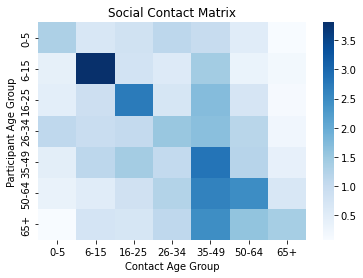

In [33]:
sns.heatmap(contact_matrix_percapita, cmap='Blues')

plt.title('Social Contact Matrix')
plt.xlabel('Contact Age Group')
plt.ylabel('Participant Age Group')

plt.show()

## Assortativity

In [34]:
beta_cap = [contact_matrix_percapita.values[i]*proportion_individuals_byage[i] for i in range(len(proportion_individuals_byage))]
beta_cap = pd.DataFrame(beta_cap, index = contact_matrix.index, columns = contact_matrix.columns)
beta_cap

cnt_age_group        0-5      6-15     16-25     26-34     35-49     50-64  \
part_age_group                                                               
0-5             0.130233  0.066279  0.080233  0.110465  0.097674  0.050000   
6-15            0.079070  0.730233  0.152326  0.110465  0.274419  0.060465   
16-25           0.081395  0.159302  0.487209  0.124419  0.303488  0.126744   
26-34           0.110465  0.097674  0.104651  0.154651  0.168605  0.118605   
35-49           0.119767  0.289535  0.363953  0.270930  0.729070  0.306977   
50-64           0.038372  0.055814  0.090698  0.134884  0.288372  0.270930   
65+             0.005814  0.046512  0.044186  0.068605  0.154651  0.100000   

cnt_age_group        65+  
part_age_group            
0-5             0.008140  
6-15            0.032558  
16-25           0.024419  
26-34           0.022093  
35-49           0.103488  
50-64           0.073256  
65+             0.087209

In [35]:
upperB = np.array([beta_cap.values[:,j]/np.sum(beta_cap.values[:,j]) for j in range(len(beta_cap.values))]).T
upperB = pd.DataFrame(upperB, index = contact_matrix.index, columns = contact_matrix.columns)
upperB

cnt_age_group        0-5      6-15     16-25     26-34     35-49     50-64  \
part_age_group                                                               
0-5             0.230453  0.045857  0.060633  0.113365  0.048443  0.048369   
6-15            0.139918  0.505229  0.115114  0.113365  0.136101  0.058493   
16-25           0.144033  0.110217  0.368190  0.127685  0.150519  0.122610   
26-34           0.195473  0.067578  0.079086  0.158711  0.083622  0.114736   
35-49           0.211934  0.200322  0.275044  0.278043  0.361592  0.296963   
50-64           0.067901  0.038616  0.068541  0.138425  0.143022  0.262092   
65+             0.010288  0.032180  0.033392  0.070406  0.076701  0.096738   

cnt_age_group        65+  
part_age_group            
0-5             0.023179  
6-15            0.092715  
16-25           0.069536  
26-34           0.062914  
35-49           0.294702  
50-64           0.208609  
65+             0.248344

In [36]:
Q = (np.sum([upperB.values[i,i] for i in range(len(upperB))])-1)/(len(upperB)-1)
Q

0.1891018812637446

## Simulation: SEIR model with age groups and yearly aging

In [37]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties

In [38]:
m=7
mu=np.array([0.0,0.0,0.0,0.0,0.0,0.0,1.0/(15*365)])
nu=np.array([1.0/(60*365),0.0,0.0,0.0,0.0,0.0,0.0])
# the population slowly increase
n=np.array(proportion_individuals_byage.values)
E0=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])*proportion_individuals_byage
I0=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])*proportion_individuals_byage
S0=np.array(proportion_individuals_byage.values)-E0-I0
R0= np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
ND=MaxTime=365.
beta=0.15*np.array(contact_matrix_percapita.values)
gamma=1/7.0
sigma=1/10.0
TS=1.0
INPUT=np.hstack((S0,E0,I0,R0))

In [39]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((28))
	V = INP
	for i in range(m):
		Inf = np.dot(beta[:,i],  V[list(np.array(range(m))+2*m)]) *V[i]    
		Y[i] = nu[i] - Inf - mu[i] * V[i]
		Y[(m+i)] = Inf - mu[i] * V[(m+i)] - sigma * V[(m+i)]
		Y[(2*m+i)] = sigma * V[(m+i)] - gamma * V[(2*m+i)] - mu[i] * V[(2*m+i)]
		Y[(3*m+i)] = gamma * V[(2*m+i)] - mu[i] * V[(3*m+i)]
	return Y   # For odeint

In [40]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

In [41]:
RES2=np.zeros((28))
k=1
while k<=100:   # one iteration for each year
	RES = spi.odeint(diff_eqs,INPUT,t_range)   # RES contains data for each day of the year
    # each year a fraction of people changes age class
	INPUT=RES[-1]
	INPUT[27]=INPUT[27]+INPUT[26]/15
	INPUT[26]=INPUT[26]+INPUT[25]/15-INPUT[26]/15
	INPUT[25]=INPUT[25]+INPUT[24]/9-INPUT[25]/15
	INPUT[24]=INPUT[24]+INPUT[23]/10-INPUT[24]/9
	INPUT[23]=INPUT[23]+INPUT[22]/10-INPUT[23]/10
	INPUT[22]=INPUT[22]+INPUT[21]/6-INPUT[22]/10
	INPUT[21]=INPUT[21]-INPUT[21]/6
	
	INPUT[20]=INPUT[20]+INPUT[19]/15
	INPUT[19]=INPUT[19]+INPUT[18]/15-INPUT[19]/15
	INPUT[18]=INPUT[18]+INPUT[17]/9-INPUT[18]/15
	INPUT[17]=INPUT[17]+INPUT[16]/10-INPUT[17]/9
	INPUT[16]=INPUT[16]+INPUT[15]/10-INPUT[16]/10
	INPUT[15]=INPUT[15]+INPUT[14]/6-INPUT[15]/10
	INPUT[14]=INPUT[14]-INPUT[14]/6
		
	INPUT[13]=INPUT[13]+INPUT[12]/15
	INPUT[12]=INPUT[12]+INPUT[11]/15-INPUT[12]/15
	INPUT[11]=INPUT[11]+INPUT[10]/9-INPUT[11]/15
	INPUT[10]=INPUT[10]+INPUT[9]/10-INPUT[10]/9
	INPUT[9]=INPUT[9]+INPUT[8]/10-INPUT[9]/10
	INPUT[8]=INPUT[8]+INPUT[7]/6-INPUT[8]/10
	INPUT[7]=INPUT[7]-INPUT[7]/6
	
	INPUT[6]=INPUT[6]+INPUT[5]/15
	INPUT[5]=INPUT[5]+INPUT[4]/15-INPUT[5]/15
	INPUT[4]=INPUT[4]+INPUT[3]/9-INPUT[4]/15
	INPUT[3]=INPUT[3]+INPUT[2]/10-INPUT[3]/9
	INPUT[2]=INPUT[2]+INPUT[1]/10-INPUT[2]/10
	INPUT[1]=INPUT[1]+INPUT[0]/6-INPUT[1]/10
	INPUT[0]=INPUT[0]-INPUT[0]/6
	RES2=np.vstack((RES2,RES))
	k=k+1

In [42]:
RES=RES2[1:,]
print(RES)

[[9.88174419e-02 1.91822093e-01 1.77871395e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.88622819e-02 1.91818010e-01 1.77867929e-01 ... 3.62643880e-06
  1.53134713e-06 8.77885803e-07]
 [9.89071472e-02 1.91814044e-01 1.77864563e-01 ... 7.17697740e-06
  3.01134256e-06 1.71830410e-06]
 ...
 [9.66072376e-02 1.36154181e-01 1.19432610e-01 ... 1.26231342e-01
  1.43323919e-01 1.42356122e-01]
 [9.66528107e-02 1.36153812e-01 1.19432338e-01 ... 1.26231795e-01
  1.43324118e-01 1.42330184e-01]
 [8.05819867e-02 1.38654496e-01 1.21104204e-01 ... 1.23410666e-01
  1.42184847e-01 1.51859204e-01]]


In [43]:
Time=np.arange(100*(ND+1))/(ND+1)

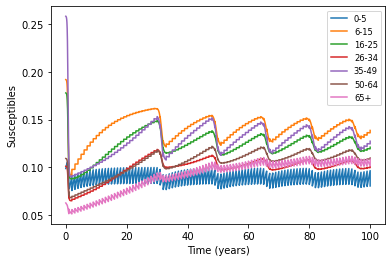

In [44]:
pl.plot(Time, RES[:,0], label = '0-5')
pl.plot(Time, RES[:,1], label = '6-15')
pl.plot(Time, RES[:,2], label = '16-25')
pl.plot(Time, RES[:,3], label = '26-34')
pl.plot(Time, RES[:,4], label = '35-49')
pl.plot(Time, RES[:,5], label = '50-64')
pl.plot(Time, RES[:,6], label = '65+')
pl.ylabel('Susceptibles')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

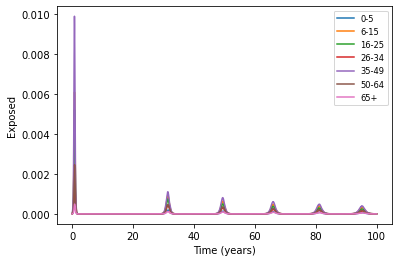

In [45]:
pl.plot(Time, RES[:,7], label = '0-5')
pl.plot(Time, RES[:,8], label = '6-15')
pl.plot(Time, RES[:,9], label = '16-25')
pl.plot(Time, RES[:,10], label = '26-34')
pl.plot(Time, RES[:,11], label = '35-49')
pl.plot(Time, RES[:,12], label = '50-64')
pl.plot(Time, RES[:,13], label = '65+')
pl.ylabel('Exposed')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

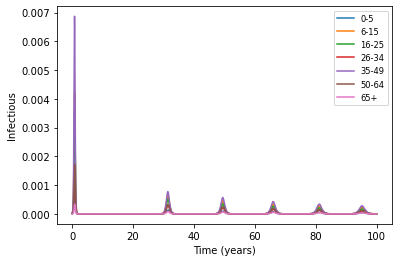

In [46]:
pl.plot(Time, RES[:,14], label = '0-5')
pl.plot(Time, RES[:,15], label = '6-15')
pl.plot(Time, RES[:,16], label = '16-25')
pl.plot(Time, RES[:,17], label = '26-34')
pl.plot(Time, RES[:,18], label = '35-49')
pl.plot(Time, RES[:,19], label = '50-64')
pl.plot(Time, RES[:,20], label = '65+')
pl.ylabel('Infectious')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

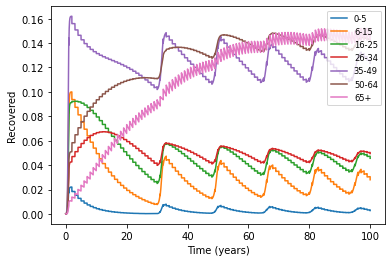

In [47]:
pl.plot(Time, RES[:,21], label = '0-5')
pl.plot(Time, RES[:,22], label = '6-15')
pl.plot(Time, RES[:,23], label = '16-25')
pl.plot(Time, RES[:,24], label = '26-34')
pl.plot(Time, RES[:,25], label = '35-49')
pl.plot(Time, RES[:,26], label = '50-64')
pl.plot(Time, RES[:,27], label = '65+')
pl.ylabel('Recovered')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

## Simulation: SIR model with age groups and yearly aging

In [48]:
m=7
mu=np.array([0.0,0.0,0.0,0.0,0.0,0.0,1.0/(15*365)])
nu=np.array([1.0/(50*365),0.0,0.0,0.0,0.0,0.0,0.0])
n=np.array(proportion_individuals_byage.values)
I0=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])*proportion_individuals_byage
S0=np.array(proportion_individuals_byage.values)-I0
R0= np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0])
ND=MaxTime=365.
beta=0.15*np.array(contact_matrix_percapita.values)
gamma=1/7.0
TS=1.0
INPUT=np.hstack((S0,I0,R0))

In [49]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((21))
	V = INP
	for i in range(m):
		Inf = np.dot(beta[:,i],  V[list(np.array(range(m))+1*m)]) *V[i]    
		Y[i] = nu[i] - Inf - mu[i] * V[i]
		Y[(1*m+i)] = Inf - gamma * V[(1*m+i)] - mu[i] * V[(1*m+i)]
		Y[(2*m+i)] = gamma * V[(1*m+i)] - mu[i] * V[(2*m+i)]
	return Y   # For odeint

In [50]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

In [51]:
RES2=np.zeros((21))
k=1
while k<=100:   # one iteration for each year
	RES = spi.odeint(diff_eqs,INPUT,t_range)   # RES contains data for each day of the year
    # each year a fraction of people changes age class
	INPUT=RES[-1]
	INPUT[20]=INPUT[20]+INPUT[19]/15
	INPUT[19]=INPUT[19]+INPUT[18]/15-INPUT[19]/15
	INPUT[18]=INPUT[18]+INPUT[17]/9-INPUT[18]/15
	INPUT[17]=INPUT[17]+INPUT[16]/10-INPUT[17]/9
	INPUT[16]=INPUT[16]+INPUT[15]/10-INPUT[16]/10
	INPUT[15]=INPUT[15]+INPUT[14]/6-INPUT[15]/10
	INPUT[14]=INPUT[14]-INPUT[14]/6
		
	INPUT[13]=INPUT[13]+INPUT[12]/15
	INPUT[12]=INPUT[12]+INPUT[11]/15-INPUT[12]/15
	INPUT[11]=INPUT[11]+INPUT[10]/9-INPUT[11]/15
	INPUT[10]=INPUT[10]+INPUT[9]/10-INPUT[10]/9
	INPUT[9]=INPUT[9]+INPUT[8]/10-INPUT[9]/10
	INPUT[8]=INPUT[8]+INPUT[7]/6-INPUT[8]/10
	INPUT[7]=INPUT[7]-INPUT[7]/6
	
	INPUT[6]=INPUT[6]+INPUT[5]/15
	INPUT[5]=INPUT[5]+INPUT[4]/15-INPUT[5]/15
	INPUT[4]=INPUT[4]+INPUT[3]/9-INPUT[4]/15
	INPUT[3]=INPUT[3]+INPUT[2]/10-INPUT[3]/9
	INPUT[2]=INPUT[2]+INPUT[1]/10-INPUT[2]/10
	INPUT[1]=INPUT[1]+INPUT[0]/6-INPUT[1]/10
	INPUT[0]=INPUT[0]-INPUT[0]/6
	RES2=np.vstack((RES2,RES))
	k=k+1

In [52]:
RES=RES2[1:,]
print(RES)

[[9.88273256e-02 1.91841279e-01 1.77889186e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.88812643e-02 1.91836968e-01 1.77885532e-01 ... 3.98053360e-06
  1.57375178e-06 8.60057353e-07]
 [9.89351649e-02 1.91832345e-01 1.77881624e-01 ... 8.54599611e-06
  3.17575676e-06 1.65079501e-06]
 ...
 [1.16033218e-01 1.58293917e-01 1.31421966e-01 ... 1.75645508e-01
  1.96877124e-01 1.91767364e-01]
 [1.16086257e-01 1.58286372e-01 1.31417139e-01 ... 1.75652148e-01
  1.96879718e-01 1.91733081e-01]
 [9.67827414e-02 1.61807473e-01 1.34098950e-01 ... 1.72327129e-01
  1.95467418e-01 2.04824295e-01]]


In [53]:
Time=np.arange(100*(ND+1))/(ND+1)

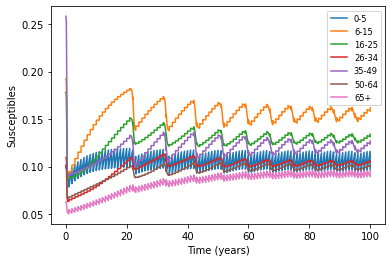

In [54]:
pl.plot(Time, RES[:,0], label = '0-5')
pl.plot(Time, RES[:,1], label = '6-15')
pl.plot(Time, RES[:,2], label = '16-25')
pl.plot(Time, RES[:,3], label = '26-34')
pl.plot(Time, RES[:,4], label = '35-49')
pl.plot(Time, RES[:,5], label = '50-64')
pl.plot(Time, RES[:,6], label = '65+')
pl.ylabel('Susceptibles')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

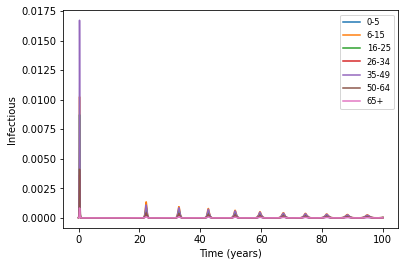

In [55]:
pl.plot(Time, RES[:,7], label = '0-5')
pl.plot(Time, RES[:,8], label = '6-15')
pl.plot(Time, RES[:,9], label = '16-25')
pl.plot(Time, RES[:,10], label = '26-34')
pl.plot(Time, RES[:,11], label = '35-49')
pl.plot(Time, RES[:,12], label = '50-64')
pl.plot(Time, RES[:,13], label = '65+')
pl.ylabel('Infectious')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

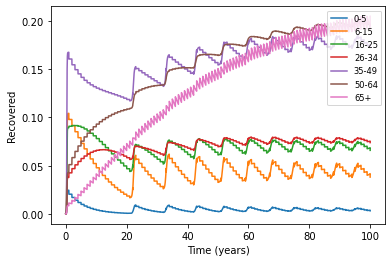

In [56]:
pl.plot(Time, RES[:,14], label = '0-5')
pl.plot(Time, RES[:,15], label = '6-15')
pl.plot(Time, RES[:,16], label = '16-25')
pl.plot(Time, RES[:,17], label = '26-34')
pl.plot(Time, RES[:,18], label = '35-49')
pl.plot(Time, RES[:,19], label = '50-64')
pl.plot(Time, RES[:,20], label = '65+')
pl.ylabel('Recovered')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

## $R_0$: by contact matrix and by eigenvalue approach

In [57]:
basic_reproductive_ratios = np.array([np.dot(beta[:,agent], proportion_individuals_byage) for agent in range(m)]) / gamma
basic_reproductive_ratios
# each element of the list is the average number of individuals infected by an agent of the i-th age group IN A TOTALLY
# SUSCEPTIBLE POPULATION

array([0.59337209, 1.51761628, 1.3894186 , 1.02313953, 2.11709302,
       1.08540698, 0.36872093])

In [58]:
np.dot(basic_reproductive_ratios, proportion_individuals_byage)   # weighted average

1.3888038804759333

In [59]:
# EIGENVALUE APPROACH
J = np.array([beta[i]*proportion_individuals_byage[i] for i in range(len(proportion_individuals_byage))]) / gamma  
J

array([[0.13674419, 0.06959302, 0.08424419, 0.11598837, 0.10255814,
        0.0525    , 0.00854651],
       [0.08302326, 0.76674419, 0.15994186, 0.11598837, 0.28813953,
        0.06348837, 0.03418605],
       [0.08546512, 0.16726744, 0.51156977, 0.13063953, 0.31866279,
        0.1330814 , 0.02563953],
       [0.11598837, 0.10255814, 0.10988372, 0.16238372, 0.17703488,
        0.12453488, 0.02319767],
       [0.12575581, 0.30401163, 0.38215116, 0.28447674, 0.76552326,
        0.32232558, 0.10866279],
       [0.0402907 , 0.05860465, 0.09523256, 0.14162791, 0.3027907 ,
        0.28447674, 0.0769186 ],
       [0.00610465, 0.04883721, 0.04639535, 0.07203488, 0.16238372,
        0.105     , 0.09156977]])

In [60]:
eigenvalues, eigenvectors = np.linalg.eig(J)

sorted_eigenvalues = np.sort(eigenvalues)[::-1]

dominant_eigenvalue = sorted_eigenvalues[0]

dominant_eigenvalue

1.453196080452162

The dominant eigenvalue of the Jacobian represents the basic reproductive ratio: it is higher than the weighted average above.

# Contacts by gender

In [61]:
data

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01   H002/S01_2          M         16-25      True     False   
1     H002/S01   H002/S01_3          F         16-25      True     False   
2     H002/S01   H002/S01_4          F         16-25      True     False   
3     H002/S01   H002/S01_1          F         35-49      True     False   
4     H002/S01   H002/S01_6          M         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6625  H325/S02   H325/S02_1          M           65+      True     False   
6626  H325/S02   H325/S02_7          M           65+     False     False   
6627  H325/S02   H325/S02_8          F           65+     False     False   
6628  H325/S02   H325/S02_9          F           65+     False     False   
6629  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
0          False          False        False           False              1.0   
1          False          False        False           False              1.0   
2          False          False        False           False              1.0   
3          False          False        False           False              1.0   
4          False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6625       False          False        False           False              1.0   
6626       False           True        False           False              2.0   
6627       False           True        False           False              2.0   
6628       False          False         True           False              2.0   
6629       False          False         True           False              2.0   

      phys_contact  duration_multi hh_id  part_age part_gender part_age_group  \
0              1.0             5.0  H002        44           M          35-49   
1              1.0             5.0  H002        44           M          35-49   
2              1.0             5.0  H002        44           M          35-49   
3              1.0             5.0  H002        44           M          35-49   
4              2.0             3.0  H002        44           M          35-49   
...            ...             ...   ...       ...         ...            ...   
6625           1.0             5.0  H325        69           F            65+   
6626           2.0             2.0  H325        69           F            65+   
6627           2.0             3.0  H325        69           F            65+   
6628           2.0             2.0  H325        69           F            65+   
6629           NaN             3.0  H325        69           F            65+   

      cnt_place  
0          Home  
1          Home  
2          Home  
3          Home  
4         Other  
...         ...  
6625       Home  
6626  Transport  
6627  Transport  
6628    Leisure  
6629    Leisure  

[6630 rows x 18 columns]

In [62]:
participants_bygender = [len(participants[participants['part_gender'] == i]) for i in gender_groups]
participants_bygender = pd.Series(participants_bygender, index = gender_groups)
participants_bygender

M    389
F    471
dtype: int64

In [63]:
proportion_individuals_bygender = participants_bygender/n_participants
proportion_individuals_bygender

M    0.452326
F    0.547674
dtype: float64

In [64]:
data.cnt_gender.value_counts()

F    3623
M    3007
Name: cnt_gender, dtype: int64

In [65]:
contacts_bygender = data.groupby(by = ['part_gender', 'cnt_gender']).aggregate({'cont_id': 'count', 'frequency_multi': 'mean', 'phys_contact': 'mean', 'duration_multi': 'mean'})

In [66]:
contacts_bygender.rename({'cont_id': 'n_contacts'}, axis = 1, inplace = True)
contacts_bygender

n_contacts  frequency_multi  phys_contact  \
part_gender cnt_gender                                              
M           M                 1624         1.248897      1.711446   
            F                 1360         1.193258      1.631579   
F           M                 1383         1.192735      1.605769   
            F                 2263         1.222072      1.731241   

                        duration_multi  
part_gender cnt_gender                  
M           M                 3.727044  
            F                 3.910459  
F           M                 3.924088  
            F                 3.601430

In [67]:
contact_matrix = contacts_bygender.n_contacts.unstack()
contact_matrix

cnt_gender      M     F
part_gender            
M            1624  1360
F            1383  2263

In [68]:
contact_matrix_percapita = [contact_matrix.values[i]/participants_bygender[i] for i in range(len(participants_bygender))]
contact_matrix_percapita = pd.DataFrame(contact_matrix_percapita, index = contact_matrix.index, columns = contact_matrix.columns)
contact_matrix_percapita   # beta

cnt_gender          M         F
part_gender                    
M            4.174807  3.496144
F            2.936306  4.804671

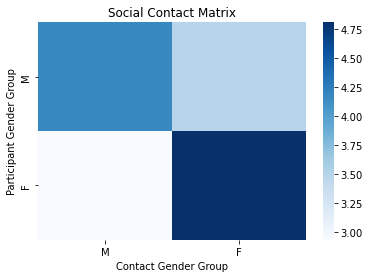

In [69]:
sns.heatmap(contact_matrix_percapita, cmap='Blues')

plt.title('Social Contact Matrix')
plt.xlabel('Contact Gender Group')
plt.ylabel('Participant Gender Group')

plt.show()

## Assortativity

In [70]:
beta_cap = [contact_matrix_percapita.values[i]*proportion_individuals_bygender[i] for i in range(len(proportion_individuals_bygender))]
beta_cap = pd.DataFrame(beta_cap, index = contact_matrix.index, columns = contact_matrix.columns)
beta_cap

cnt_gender          M         F
part_gender                    
M            1.888372  1.581395
F            1.608140  2.631395

In [71]:
upperB = np.array([beta_cap.values[:,j]/np.sum(beta_cap.values[:,j]) for j in range(len(beta_cap.values))]).T
upperB = pd.DataFrame(upperB, index = contact_matrix.index, columns = contact_matrix.columns)
upperB

cnt_gender          M        F
part_gender                   
M            0.540073  0.37538
F            0.459927  0.62462

In [72]:
Q = (np.sum([upperB.values[i,i] for i in range(len(upperB))])-1)/(len(upperB)-1)
Q

0.1646936428855259

## Simulation: SIS model with male/female risk groups

In [73]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [74]:
beta=0.05*contact_matrix_percapita.values.flatten()
gamma=1/1.0
nM=proportion_individuals_bygender[0]
nT=1.0
nF=nT-nM
IM=1e-4*nM
IF=1e-4*nF
SM=nM-IM
SF=nF-IF
ND=15.
TS=1.0

In [75]:
INPUT = (SM,IM,SF,IF)

In [76]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	Y[0] = - (beta[0] * V[1] + beta[1] * V[3]) * V[0] + gamma * V[1]
	Y[1] = (beta[0] * V[1] + beta[1] * V[3]) * V[0] - gamma * V[1]
	Y[2] = - (beta[2] * V[1] + beta[3] * V[3]) * V[2] + gamma * V[3]
	Y[3] = (beta[2] * V[1] + beta[3] * V[3]) * V[2] - gamma * V[3]
	return Y   # For odeint

In [77]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

In [78]:
print(RES)

[[4.52280349e-01 4.52325581e-05 5.47619651e-01 5.47674419e-05]
 [4.52305446e-01 2.01350838e-05 5.47649863e-01 2.45559796e-05]
 [4.52316609e-01 8.97212257e-06 5.47663409e-01 1.10093188e-05]
 [4.52321582e-01 3.99953024e-06 5.47669485e-01 4.93340441e-06]
 [4.52323802e-01 1.77938236e-06 5.47672214e-01 2.20478486e-06]
 [4.52324787e-01 7.94559941e-07 5.47673431e-01 9.88074999e-07]
 [4.52325226e-01 3.55685128e-07 5.47673975e-01 4.43675355e-07]
 [4.52325422e-01 1.59491217e-07 5.47674219e-01 1.99383087e-07]
 [4.52325511e-01 6.99962796e-08 5.47674331e-01 8.78176976e-08]
 [4.52325551e-01 3.05876014e-08 5.47674380e-01 3.84432073e-08]
 [4.52325567e-01 1.40894548e-08 5.47674401e-01 1.77038953e-08]
 [4.52325575e-01 6.58472852e-09 5.47674410e-01 8.28217715e-09]
 [4.52325578e-01 3.01215827e-09 5.47674415e-01 3.79525823e-09]
 [4.52325580e-01 1.37834244e-09 5.47674417e-01 1.73772584e-09]
 [4.52325581e-01 6.37640892e-10 5.47674418e-01 8.04165258e-10]
 [4.52325581e-01 1.86149230e-10 5.47674418e-01 2.352481

Text(0, 0.5, 'Infectious')

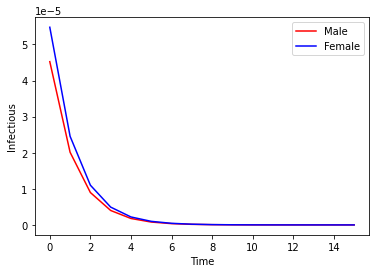

In [79]:
pl.plot(RES[:,1], '-r', label='Male')
pl.plot(RES[:,3], '-b', label='Female')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')

## $R_0$ by contact matrix and by eigenvalue approach

In [80]:
beta = beta.reshape(2,2)

In [81]:
basic_reproductive_ratios = np.array([np.dot(beta[:,agent], proportion_individuals_bygender) for agent in range(len(proportion_individuals_bygender))]) / gamma
basic_reproductive_ratios

array([0.17482558, 0.21063953])

In [82]:
np.dot(basic_reproductive_ratios, proportion_individuals_bygender)

0.19443996755002704

In [83]:
# EIGENVALUE APPROACH
J = np.array([beta[i]*proportion_individuals_bygender[i] for i in range(len(proportion_individuals_bygender))]) / gamma  
J

array([[0.0944186 , 0.07906977],
       [0.08040698, 0.13156977]])

In [84]:
eigenvalues, eigenvectors = np.linalg.eig(J)

sorted_eigenvalues = np.sort(eigenvalues)[::-1]

dominant_eigenvalue = sorted_eigenvalues[0]

dominant_eigenvalue

0.19486489616949215

# Machine Learning

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [86]:
data

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01   H002/S01_2          M         16-25      True     False   
1     H002/S01   H002/S01_3          F         16-25      True     False   
2     H002/S01   H002/S01_4          F         16-25      True     False   
3     H002/S01   H002/S01_1          F         35-49      True     False   
4     H002/S01   H002/S01_6          M         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6625  H325/S02   H325/S02_1          M           65+      True     False   
6626  H325/S02   H325/S02_7          M           65+     False     False   
6627  H325/S02   H325/S02_8          F           65+     False     False   
6628  H325/S02   H325/S02_9          F           65+     False     False   
6629  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
0          False          False        False           False              1.0   
1          False          False        False           False              1.0   
2          False          False        False           False              1.0   
3          False          False        False           False              1.0   
4          False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6625       False          False        False           False              1.0   
6626       False           True        False           False              2.0   
6627       False           True        False           False              2.0   
6628       False          False         True           False              2.0   
6629       False          False         True           False              2.0   

      phys_contact  duration_multi hh_id  part_age part_gender part_age_group  \
0              1.0             5.0  H002        44           M          35-49   
1              1.0             5.0  H002        44           M          35-49   
2              1.0             5.0  H002        44           M          35-49   
3              1.0             5.0  H002        44           M          35-49   
4              2.0             3.0  H002        44           M          35-49   
...            ...             ...   ...       ...         ...            ...   
6625           1.0             5.0  H325        69           F            65+   
6626           2.0             2.0  H325        69           F            65+   
6627           2.0             3.0  H325        69           F            65+   
6628           2.0             2.0  H325        69           F            65+   
6629           NaN             3.0  H325        69           F            65+   

      cnt_place  
0          Home  
1          Home  
2          Home  
3          Home  
4         Other  
...         ...  
6625       Home  
6626  Transport  
6627  Transport  
6628    Leisure  
6629    Leisure  

[6630 rows x 18 columns]

In [87]:
data[data.isna().any(axis=1)]

part_id      cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
6     H002/S01   H002/S01_9          F         35-49     False     False   
37    H002/S04   H002/S04_3          M         16-25      True     False   
38    H002/S04   H002/S04_4          F         16-25      True     False   
67    H003/S02   H003/S02_2          M         16-25      True     False   
88    H004/S01   H004/S01_5          F         35-49     False     False   
...        ...          ...        ...           ...       ...       ...   
6616  H325/S01   H325/S01_4          F         50-64     False     False   
6617  H325/S01   H325/S01_8          M         50-64     False     False   
6619  H325/S01   H325/S01_7          M           65+     False     False   
6622  H325/S02   H325/S02_2          M         35-49     False     False   
6629  H325/S02  H325/S02_10          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
6          False          False        False            True              1.0   
37         False          False        False           False              1.0   
38         False          False        False           False              1.0   
67         False          False        False           False              1.0   
88         False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6616       False          False        False           False              2.0   
6617       False          False        False           False              2.0   
6619       False          False        False           False              2.0   
6622       False          False        False           False              1.0   
6629       False          False         True           False              2.0   

      phys_contact  duration_multi hh_id  part_age part_gender part_age_group  \
6              NaN             3.0  H002        44           M          35-49   
37             NaN             5.0  H002        17           F          16-25   
38             NaN             5.0  H002        17           F          16-25   
67             1.0             NaN  H003        44           F          35-49   
88             NaN             3.0  H004        50           M          50-64   
...            ...             ...   ...       ...         ...            ...   
6616           2.0             3.0  H325        71           M            65+   
6617           2.0             3.0  H325        71           M            65+   
6619           1.0             3.0  H325        71           M            65+   
6622           2.0             4.0  H325        69           F            65+   
6629           NaN             3.0  H325        69           F            65+   

     cnt_place  
6        Other  
37        Home  
38        Home  
67        Home  
88       Other  
...        ...  
6616       NaN  
6617       NaN  
6619       NaN  
6622       NaN  
6629   Leisure  

[908 rows x 18 columns]

In [88]:
data.dropna(how = 'any', axis = 0, inplace = True)
data

part_id     cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01  H002/S01_2          M         16-25      True     False   
1     H002/S01  H002/S01_3          F         16-25      True     False   
2     H002/S01  H002/S01_4          F         16-25      True     False   
3     H002/S01  H002/S01_1          F         35-49      True     False   
4     H002/S01  H002/S01_6          M         35-49     False     False   
...        ...         ...        ...           ...       ...       ...   
6624  H325/S02  H325/S02_4          M         35-49     False     False   
6625  H325/S02  H325/S02_1          M           65+      True     False   
6626  H325/S02  H325/S02_7          M           65+     False     False   
6627  H325/S02  H325/S02_8          F           65+     False     False   
6628  H325/S02  H325/S02_9          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  frequency_multi  \
0          False          False        False           False              1.0   
1          False          False        False           False              1.0   
2          False          False        False           False              1.0   
3          False          False        False           False              1.0   
4          False          False        False            True              2.0   
...          ...            ...          ...             ...              ...   
6624       False          False        False            True              2.0   
6625       False          False        False           False              1.0   
6626       False           True        False           False              2.0   
6627       False           True        False           False              2.0   
6628       False          False         True           False              2.0   

      phys_contact  duration_multi hh_id  part_age part_gender part_age_group  \
0              1.0             5.0  H002        44           M          35-49   
1              1.0             5.0  H002        44           M          35-49   
2              1.0             5.0  H002        44           M          35-49   
3              1.0             5.0  H002        44           M          35-49   
4              2.0             3.0  H002        44           M          35-49   
...            ...             ...   ...       ...         ...            ...   
6624           2.0             2.0  H325        69           F            65+   
6625           1.0             5.0  H325        69           F            65+   
6626           2.0             2.0  H325        69           F            65+   
6627           2.0             3.0  H325        69           F            65+   
6628           2.0             2.0  H325        69           F            65+   

      cnt_place  
0          Home  
1          Home  
2          Home  
3          Home  
4         Other  
...         ...  
6624      Other  
6625       Home  
6626  Transport  
6627  Transport  
6628    Leisure  

[5722 rows x 18 columns]

In [89]:
data_encoded = pd.concat([data, pd.get_dummies(data[['cnt_gender', 'cnt_age_group']])], axis = 1)
data_encoded

part_id     cont_id cnt_gender cnt_age_group  cnt_home  cnt_work  \
0     H002/S01  H002/S01_2          M         16-25      True     False   
1     H002/S01  H002/S01_3          F         16-25      True     False   
2     H002/S01  H002/S01_4          F         16-25      True     False   
3     H002/S01  H002/S01_1          F         35-49      True     False   
4     H002/S01  H002/S01_6          M         35-49     False     False   
...        ...         ...        ...           ...       ...       ...   
6624  H325/S02  H325/S02_4          M         35-49     False     False   
6625  H325/S02  H325/S02_1          M           65+      True     False   
6626  H325/S02  H325/S02_7          M           65+     False     False   
6627  H325/S02  H325/S02_8          F           65+     False     False   
6628  H325/S02  H325/S02_9          F           65+     False     False   

      cnt_school  cnt_transport  cnt_leisure  cnt_otherplace  ...  cnt_place  \
0          False          False        False           False  ...       Home   
1          False          False        False           False  ...       Home   
2          False          False        False           False  ...       Home   
3          False          False        False           False  ...       Home   
4          False          False        False            True  ...      Other   
...          ...            ...          ...             ...  ...        ...   
6624       False          False        False            True  ...      Other   
6625       False          False        False           False  ...       Home   
6626       False           True        False           False  ...  Transport   
6627       False           True        False           False  ...  Transport   
6628       False          False         True           False  ...    Leisure   

      cnt_gender_M  cnt_gender_F cnt_age_group_0-5  cnt_age_group_6-15  \
0                1             0                 0                   0   
1                0             1                 0                   0   
2                0             1                 0                   0   
3                0             1                 0                   0   
4                1             0                 0                   0   
...            ...           ...               ...                 ...   
6624             1             0                 0                   0   
6625             1             0                 0                   0   
6626             1             0                 0                   0   
6627             0             1                 0                   0   
6628             0             1                 0                   0   

     cnt_age_group_16-25 cnt_age_group_26-34 cnt_age_group_35-49  \
0                      1                   0                   0   
1                      1                   0                   0   
2                      1                   0                   0   
3                      0                   0                   1   
4                      0                   0                   1   
...                  ...                 ...                 ...   
6624                   0                   0                   1   
6625                   0                   0                   0   
6626                   0                   0                   0   
6627                   0                   0                   0   
6628                   0                   0                   0   

      cnt_age_group_50-64  cnt_age_group_65+  
0                       0                  0  
1                       0                  0  
2                       0                  0  
3                       0                  0  
4                       0                  0  
...                   ...                ...  
6624                    0                  0  
6625                    0                  1  
6626            

In [90]:
df_ML = data_encoded.groupby('part_id').aggregate({'cont_id': 'count', 'cnt_gender_F': 'mean', 'cnt_gender_M': 'mean', 'cnt_age_group_0-5': 'mean', 'cnt_age_group_6-15': 'mean', 'cnt_age_group_16-25': 'mean', 'cnt_age_group_26-34': 'mean', 'cnt_age_group_35-49': 'mean', 'cnt_age_group_50-64': 'mean', 'cnt_age_group_65+': 'mean', 'cnt_home': 'mean', 'cnt_work': 'mean', 'cnt_school': 'mean', 'cnt_transport': 'mean', 'cnt_leisure': 'mean', 'cnt_otherplace': 'mean', 'frequency_multi': 'mean', 'phys_contact': 'mean', 'duration_multi': 'mean'})
df_ML.rename({'cont_id': 'n_contacts'}, axis = 1, inplace = True)
df_ML.drop({'cnt_gender_M', 'cnt_age_group_65+', 'cnt_otherplace'}, axis = 1, inplace = True)
df_ML

n_contacts  cnt_gender_F  cnt_age_group_0-5  cnt_age_group_6-15  \
part_id                                                                     
H002/S01          13      0.384615           0.000000            0.000000   
H002/S02          14      0.642857           0.000000            0.000000   
H002/S03           9      0.333333           0.000000            0.000000   
H002/S04          10      0.900000           0.000000            0.000000   
H002/S05          12      0.666667           0.000000            0.000000   
...              ...           ...                ...                 ...   
H320/S04           4      0.500000           0.250000            0.000000   
H321/S01          15      0.466667           0.066667            0.133333   
H321/S02           2      0.500000           0.000000            0.000000   
H325/S01           4      0.500000           0.000000            0.000000   
H325/S02           8      0.375000           0.000000            0.000000   

          cnt_age_group_16-25  cnt_age_group_26-34  cnt_age_group_35-49  \
part_id                                                                   
H002/S01             0.230769             0.000000             0.461538   
H002/S02             0.214286             0.142857             0.214286   
H002/S03             0.444444             0.333333             0.222222   
H002/S04             0.700000             0.100000             0.200000   
H002/S05             0.833333             0.000000             0.166667   
...                       ...                  ...                  ...   
H320/S04             0.250000             0.250000             0.000000   
H321/S01             0.000000             0.266667             0.266667   
H321/S02             0.000000             1.000000             0.000000   
H325/S01             0.000000             0.000000             0.500000   
H325/S02             0.125000             0.125000             0.250000   

          cnt_age_group_50-64  cnt_home  cnt_work  cnt_school  cnt_transport  \
part_id                                                                        
H002/S01             0.153846  0.538462       0.0    0.000000          0.000   
H002/S02             0.428571  0.285714       0.0    0.000000          0.000   
H002/S03             0.000000  0.444444       0.0    0.000000          0.000   
H002/S04             0.000000  0.200000       0.7    0.000000          0.000   
H002/S05             0.000000  0.333333       0.0    0.666667          0.000   
...                       ...       ...       ...         ...            ...   
H320/S04             0.250000  1.000000       0.0    0.000000          0.000   
H321/S01             0.066667  0.533333       0.0    0.000000          0.000   
H321/S02             0.000000  1.000000       0.0    0.000000          0.000   
H325/S01             0.250000  0.250000       0.0    0.000000          0.000   
H325/S02             0.000000  0.125000       0.0    0.000000          0.375   

          cnt_leisure  frequency_multi  phys_contact  duration_multi  
part_id                                                               
H002/S01     0.000000         1.461538      1.692308        3.615385  
H002/S02     0.000000         1.214286      1.571429        3.642857  
H002/S03     0.111111         1.444444      1.333333        3.888889  
H002/S04     0.000000         1.100000      1.100000        3.800000  
H002/S05     0.000000         1.000000      1.416667        4.333333  
...               ...              ...           ...             ...  
H320/S04     0.000000         1.000000      1.000000        5.000000  
H321/S01     0.266667         1.733333      1.800000        3.133333  
H321/S02     0.000000         1.000000      1.000000        5.000000  
H325/S01     0.000000         1.500000      1.750000        3.750000  
H325/S02     0.125000         1.875000      1.875000        2.750000  

[821 rows x 16 columns]

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(df_ML)

StandardScaler()

In [93]:
data_scaled = scaler.transform(df_ML)
data_scaled = pd.DataFrame(data_scaled, index = df_ML.index, columns = df_ML.columns)
data_scaled

n_contacts  cnt_gender_F  cnt_age_group_0-5  cnt_age_group_6-15  \
part_id                                                                     
H002/S01    1.542640     -0.730400          -0.556453           -0.776692   
H002/S02    1.798448      0.402469          -0.556453           -0.776692   
H002/S03    0.519406     -0.955367          -0.556453           -0.776692   
H002/S04    0.775215      1.530516          -0.556453           -0.776692   
H002/S05    1.286832      0.506917          -0.556453           -0.776692   
...              ...           ...                ...                 ...   
H320/S04   -0.759636     -0.224225           1.066864           -0.776692   
H321/S01    2.054257     -0.370453          -0.123568           -0.175969   
H321/S02   -1.271252     -0.224225          -0.556453           -0.776692   
H325/S01   -0.759636     -0.224225          -0.556453           -0.776692   
H325/S02    0.263598     -0.772581          -0.556453           -0.776692   

          cnt_age_group_16-25  cnt_age_group_26-34  cnt_age_group_35-49  \
part_id                                                                   
H002/S01             0.317481            -0.739411             0.884845   
H002/S02             0.233136             0.062177            -0.275373   
H002/S03             1.410845             1.130961            -0.238132   
H002/S04             2.718508            -0.178300            -0.342408   
H002/S05             3.400767            -0.739411            -0.498823   
...                       ...                  ...                  ...   
H320/S04             0.415884             0.663368            -1.280896   
H321/S01            -0.863352             0.756886            -0.029579   
H321/S02            -0.863352             4.871704            -1.280896   
H325/S01            -0.863352            -0.739411             1.065323   
H325/S02            -0.223734            -0.038022            -0.107786   

          cnt_age_group_50-64  cnt_home  cnt_work  cnt_school  cnt_transport  \
part_id                                                                        
H002/S01             0.136627 -0.768945 -0.421977   -0.389941      -0.320893   
H002/S02             1.669601 -1.615543 -0.421977   -0.389941      -0.320893   
H002/S03            -0.721838 -1.083863 -0.421977   -0.389941      -0.320893   
H002/S04            -0.721838 -1.902651  3.286866   -0.389941      -0.320893   
H002/S05            -0.721838 -1.456039 -0.421977    2.771756      -0.320893   
...                       ...       ...       ...         ...            ...   
H320/S04             0.673168  0.777017 -0.421977   -0.389941      -0.320893   
H321/S01            -0.349837 -0.786123 -0.421977   -0.389941      -0.320893   
H321/S02            -0.721838  0.777017 -0.421977   -0.389941      -0.320893   
H325/S01             0.673168 -1.735171 -0.421977   -0.389941      -0.320893   
H325/S02            -0.721838 -2.153869 -0.421977   -0.389941       3.186202   

          cnt_leisure  frequency_multi  phys_contact  duration_multi  
part_id                                                               
H002/S01    -0.174423         0.970597      0.213059       -0.291141  
H002/S02    -0.174423         0.112672     -0.143743       -0.264485  
H002/S03     1.832741         0.911284     -0.846534       -0.025767  
H002/S04    -0.174423        -0.283879     -1.535269       -0.112013  
H002/S05    -0.174423        -0.630862     -0.600557        0.405467  
...               ...              ...           ...             ...  
H320/S04    -0.174423        -0.630862     -1.830441        1.052317  
H321/S01     4.642770         1.913679      0.530936       -0.758863  
H321/S02    -0.174423        -0.630862     -1.830441        1.052317  
H325/S01    -0.174423         1.104052      0.383350       -0.160527  
H325/S02     2.083636         2.405238      0.752315       -1.130802  

[821 rows x 16 columns]

In [94]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(data_scaled.values)

cluster_labels = kmeans.labels_

In [95]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 10161.465662875527


In [96]:
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.16441637287912933


In [97]:
db_index = davies_bouldin_score(data_scaled, cluster_labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 2.0332339598683635


In [98]:
data_clustered = df_ML
data_clustered['cluster']= cluster_labels
data_clustered

n_contacts  cnt_gender_F  cnt_age_group_0-5  cnt_age_group_6-15  \
part_id                                                                     
H002/S01          13      0.384615           0.000000            0.000000   
H002/S02          14      0.642857           0.000000            0.000000   
H002/S03           9      0.333333           0.000000            0.000000   
H002/S04          10      0.900000           0.000000            0.000000   
H002/S05          12      0.666667           0.000000            0.000000   
...              ...           ...                ...                 ...   
H320/S04           4      0.500000           0.250000            0.000000   
H321/S01          15      0.466667           0.066667            0.133333   
H321/S02           2      0.500000           0.000000            0.000000   
H325/S01           4      0.500000           0.000000            0.000000   
H325/S02           8      0.375000           0.000000            0.000000   

          cnt_age_group_16-25  cnt_age_group_26-34  cnt_age_group_35-49  \
part_id                                                                   
H002/S01             0.230769             0.000000             0.461538   
H002/S02             0.214286             0.142857             0.214286   
H002/S03             0.444444             0.333333             0.222222   
H002/S04             0.700000             0.100000             0.200000   
H002/S05             0.833333             0.000000             0.166667   
...                       ...                  ...                  ...   
H320/S04             0.250000             0.250000             0.000000   
H321/S01             0.000000             0.266667             0.266667   
H321/S02             0.000000             1.000000             0.000000   
H325/S01             0.000000             0.000000             0.500000   
H325/S02             0.125000             0.125000             0.250000   

          cnt_age_group_50-64  cnt_home  cnt_work  cnt_school  cnt_transport  \
part_id                                                                        
H002/S01             0.153846  0.538462       0.0    0.000000          0.000   
H002/S02             0.428571  0.285714       0.0    0.000000          0.000   
H002/S03             0.000000  0.444444       0.0    0.000000          0.000   
H002/S04             0.000000  0.200000       0.7    0.000000          0.000   
H002/S05             0.000000  0.333333       0.0    0.666667          0.000   
...                       ...       ...       ...         ...            ...   
H320/S04             0.250000  1.000000       0.0    0.000000          0.000   
H321/S01             0.066667  0.533333       0.0    0.000000          0.000   
H321/S02             0.000000  1.000000       0.0    0.000000          0.000   
H325/S01             0.250000  0.250000       0.0    0.000000          0.000   
H325/S02             0.000000  0.125000       0.0    0.000000          0.375   

          cnt_leisure  frequency_multi  phys_contact  duration_multi  cluster  
part_id                                                                        
H002/S01     0.000000         1.461538      1.692308        3.615385        2  
H002/S02     0.000000         1.214286      1.571429        3.642857        2  
H002/S03     0.111111         1.444444      1.333333        3.888889        2  
H002/S04     0.000000         1.100000      1.100000        3.800000        2  
H002/S05     0.000000         1.000000      1.416667        4.333333        0  
...               ...              ...           ...             ...      ...  
H320/S04     0.000000         1.000000      1.000000        5.000000        1  
H321/S01     0.266667         1.733333      1.800000        3.133333        2  
H321/S02     0.000000         1.000000      1.000000        5.000000        1  
H325/S01     0.000000         1.500000      1.750000        3.750000        2  
H325/S02     0.125000         1

In [99]:
participants_clustered = pd.merge(participants, data_clustered, left_on = 'part_id', right_index = True)
participants_clustered

part_id hh_id  part_age part_gender part_age_group  n_contacts  \
0    H002/S01  H002        44           M          35-49          13   
1    H002/S02  H002        41           F          35-49          14   
2    H002/S03  H002        21           M          16-25           9   
3    H002/S04  H002        17           F          16-25          10   
4    H002/S05  H002        16           F          16-25          12   
..        ...   ...       ...         ...            ...         ...   
859  H320/S04  H320         2           M            0-5           4   
860  H321/S01  H321        36           F          35-49          15   
861  H321/S02  H321        12           M           6-15           2   
863  H325/S01  H325        71           M            65+           4   
864  H325/S02  H325        69           F            65+           8   

     cnt_gender_F  cnt_age_group_0-5  cnt_age_group_6-15  cnt_age_group_16-25  \
0        0.384615           0.000000            0.000000             0.230769   
1        0.642857           0.000000            0.000000             0.214286   
2        0.333333           0.000000            0.000000             0.444444   
3        0.900000           0.000000            0.000000             0.700000   
4        0.666667           0.000000            0.000000             0.833333   
..            ...                ...                 ...                  ...   
859      0.500000           0.250000            0.000000             0.250000   
860      0.466667           0.066667            0.133333             0.000000   
861      0.500000           0.000000            0.000000             0.000000   
863      0.500000           0.000000            0.000000             0.000000   
864      0.375000           0.000000            0.000000             0.125000   

     ...  cnt_age_group_50-64  cnt_home  cnt_work  cnt_school  cnt_transport  \
0    ...             0.153846  0.538462       0.0    0.000000          0.000   
1    ...             0.428571  0.285714       0.0    0.000000          0.000   
2    ...             0.000000  0.444444       0.0    0.000000          0.000   
3    ...             0.000000  0.200000       0.7    0.000000          0.000   
4    ...             0.000000  0.333333       0.0    0.666667          0.000   
..   ...                  ...       ...       ...         ...            ...   
859  ...             0.250000  1.000000       0.0    0.000000          0.000   
860  ...             0.066667  0.533333       0.0    0.000000          0.000   
861  ...             0.000000  1.000000       0.0    0.000000          0.000   
863  ...             0.250000  0.250000       0.0    0.000000          0.000   
864  ...             0.000000  0.125000       0.0    0.000000          0.375   

     cnt_leisure  frequency_multi  phys_contact  duration_multi  cluster  
0       0.000000         1.461538      1.692308        3.615385        2  
1       0.000000         1.214286      1.571429        3.642857        2  
2       0.111111         1.444444      1.333333        3.888889        2  
3       0.000000         1.100000      1.100000        3.800000        2  
4       0.000000         1.000000      1.416667        4.333333        0  
..           ...              ...           ...             ...      ...  
859     0.000000         1.000000      1.000000        5.000000        1  
860     0.266667         1.733333      1.800000        3.133333        2  
861     0.000000         1.000000      1.000000        5.000000        1  
863     0.000000         1.500000      1.750000        3.750000        2  
864     0.125000         1.875000      1.875000        2.750000        2  

[821 rows x 22 columns]

In [100]:
hh[hh.isna().any(axis=1)]

Empty DataFrame
Columns: [hh_id, hh_size, country]
Index: []

In [101]:
final_df = pd.merge(participants_clustered, hh, on = 'hh_id')
final_df

part_id hh_id  part_age part_gender part_age_group  n_contacts  \
0    H002/S01  H002        44           M          35-49          13   
1    H002/S02  H002        41           F          35-49          14   
2    H002/S03  H002        21           M          16-25           9   
3    H002/S04  H002        17           F          16-25          10   
4    H002/S05  H002        16           F          16-25          12   
..        ...   ...       ...         ...            ...         ...   
816  H320/S04  H320         2           M            0-5           4   
817  H321/S01  H321        36           F          35-49          15   
818  H321/S02  H321        12           M           6-15           2   
819  H325/S01  H325        71           M            65+           4   
820  H325/S02  H325        69           F            65+           8   

     cnt_gender_F  cnt_age_group_0-5  cnt_age_group_6-15  cnt_age_group_16-25  \
0        0.384615           0.000000            0.000000             0.230769   
1        0.642857           0.000000            0.000000             0.214286   
2        0.333333           0.000000            0.000000             0.444444   
3        0.900000           0.000000            0.000000             0.700000   
4        0.666667           0.000000            0.000000             0.833333   
..            ...                ...                 ...                  ...   
816      0.500000           0.250000            0.000000             0.250000   
817      0.466667           0.066667            0.133333             0.000000   
818      0.500000           0.000000            0.000000             0.000000   
819      0.500000           0.000000            0.000000             0.000000   
820      0.375000           0.000000            0.000000             0.125000   

     ...  cnt_work  cnt_school  cnt_transport  cnt_leisure  frequency_multi  \
0    ...       0.0    0.000000          0.000     0.000000         1.461538   
1    ...       0.0    0.000000          0.000     0.000000         1.214286   
2    ...       0.0    0.000000          0.000     0.111111         1.444444   
3    ...       0.7    0.000000          0.000     0.000000         1.100000   
4    ...       0.0    0.666667          0.000     0.000000         1.000000   
..   ...       ...         ...            ...          ...              ...   
816  ...       0.0    0.000000          0.000     0.000000         1.000000   
817  ...       0.0    0.000000          0.000     0.266667         1.733333   
818  ...       0.0    0.000000          0.000     0.000000         1.000000   
819  ...       0.0    0.000000          0.000     0.000000         1.500000   
820  ...       0.0    0.000000          0.375     0.125000         1.875000   

     phys_contact  duration_multi  cluster  hh_size  country  
0        1.692308        3.615385        2       61       VN  
1        1.571429        3.642857        2       61       VN  
2        1.333333        3.888889        2       61       VN  
3        1.100000        3.800000        2       61       VN  
4        1.416667        4.333333        0       61       VN  
..            ...             ...      ...      ...      ...  
816      1.000000        5.000000        1       17       VN  
817      1.800000        3.133333        2       43       VN  
818      1.000000        5.000000        1       43       VN  
819      1.750000        3.750000        2       19       VN  
820      1.875000        2.750000        2       19       VN  

[821 rows x 24 columns]

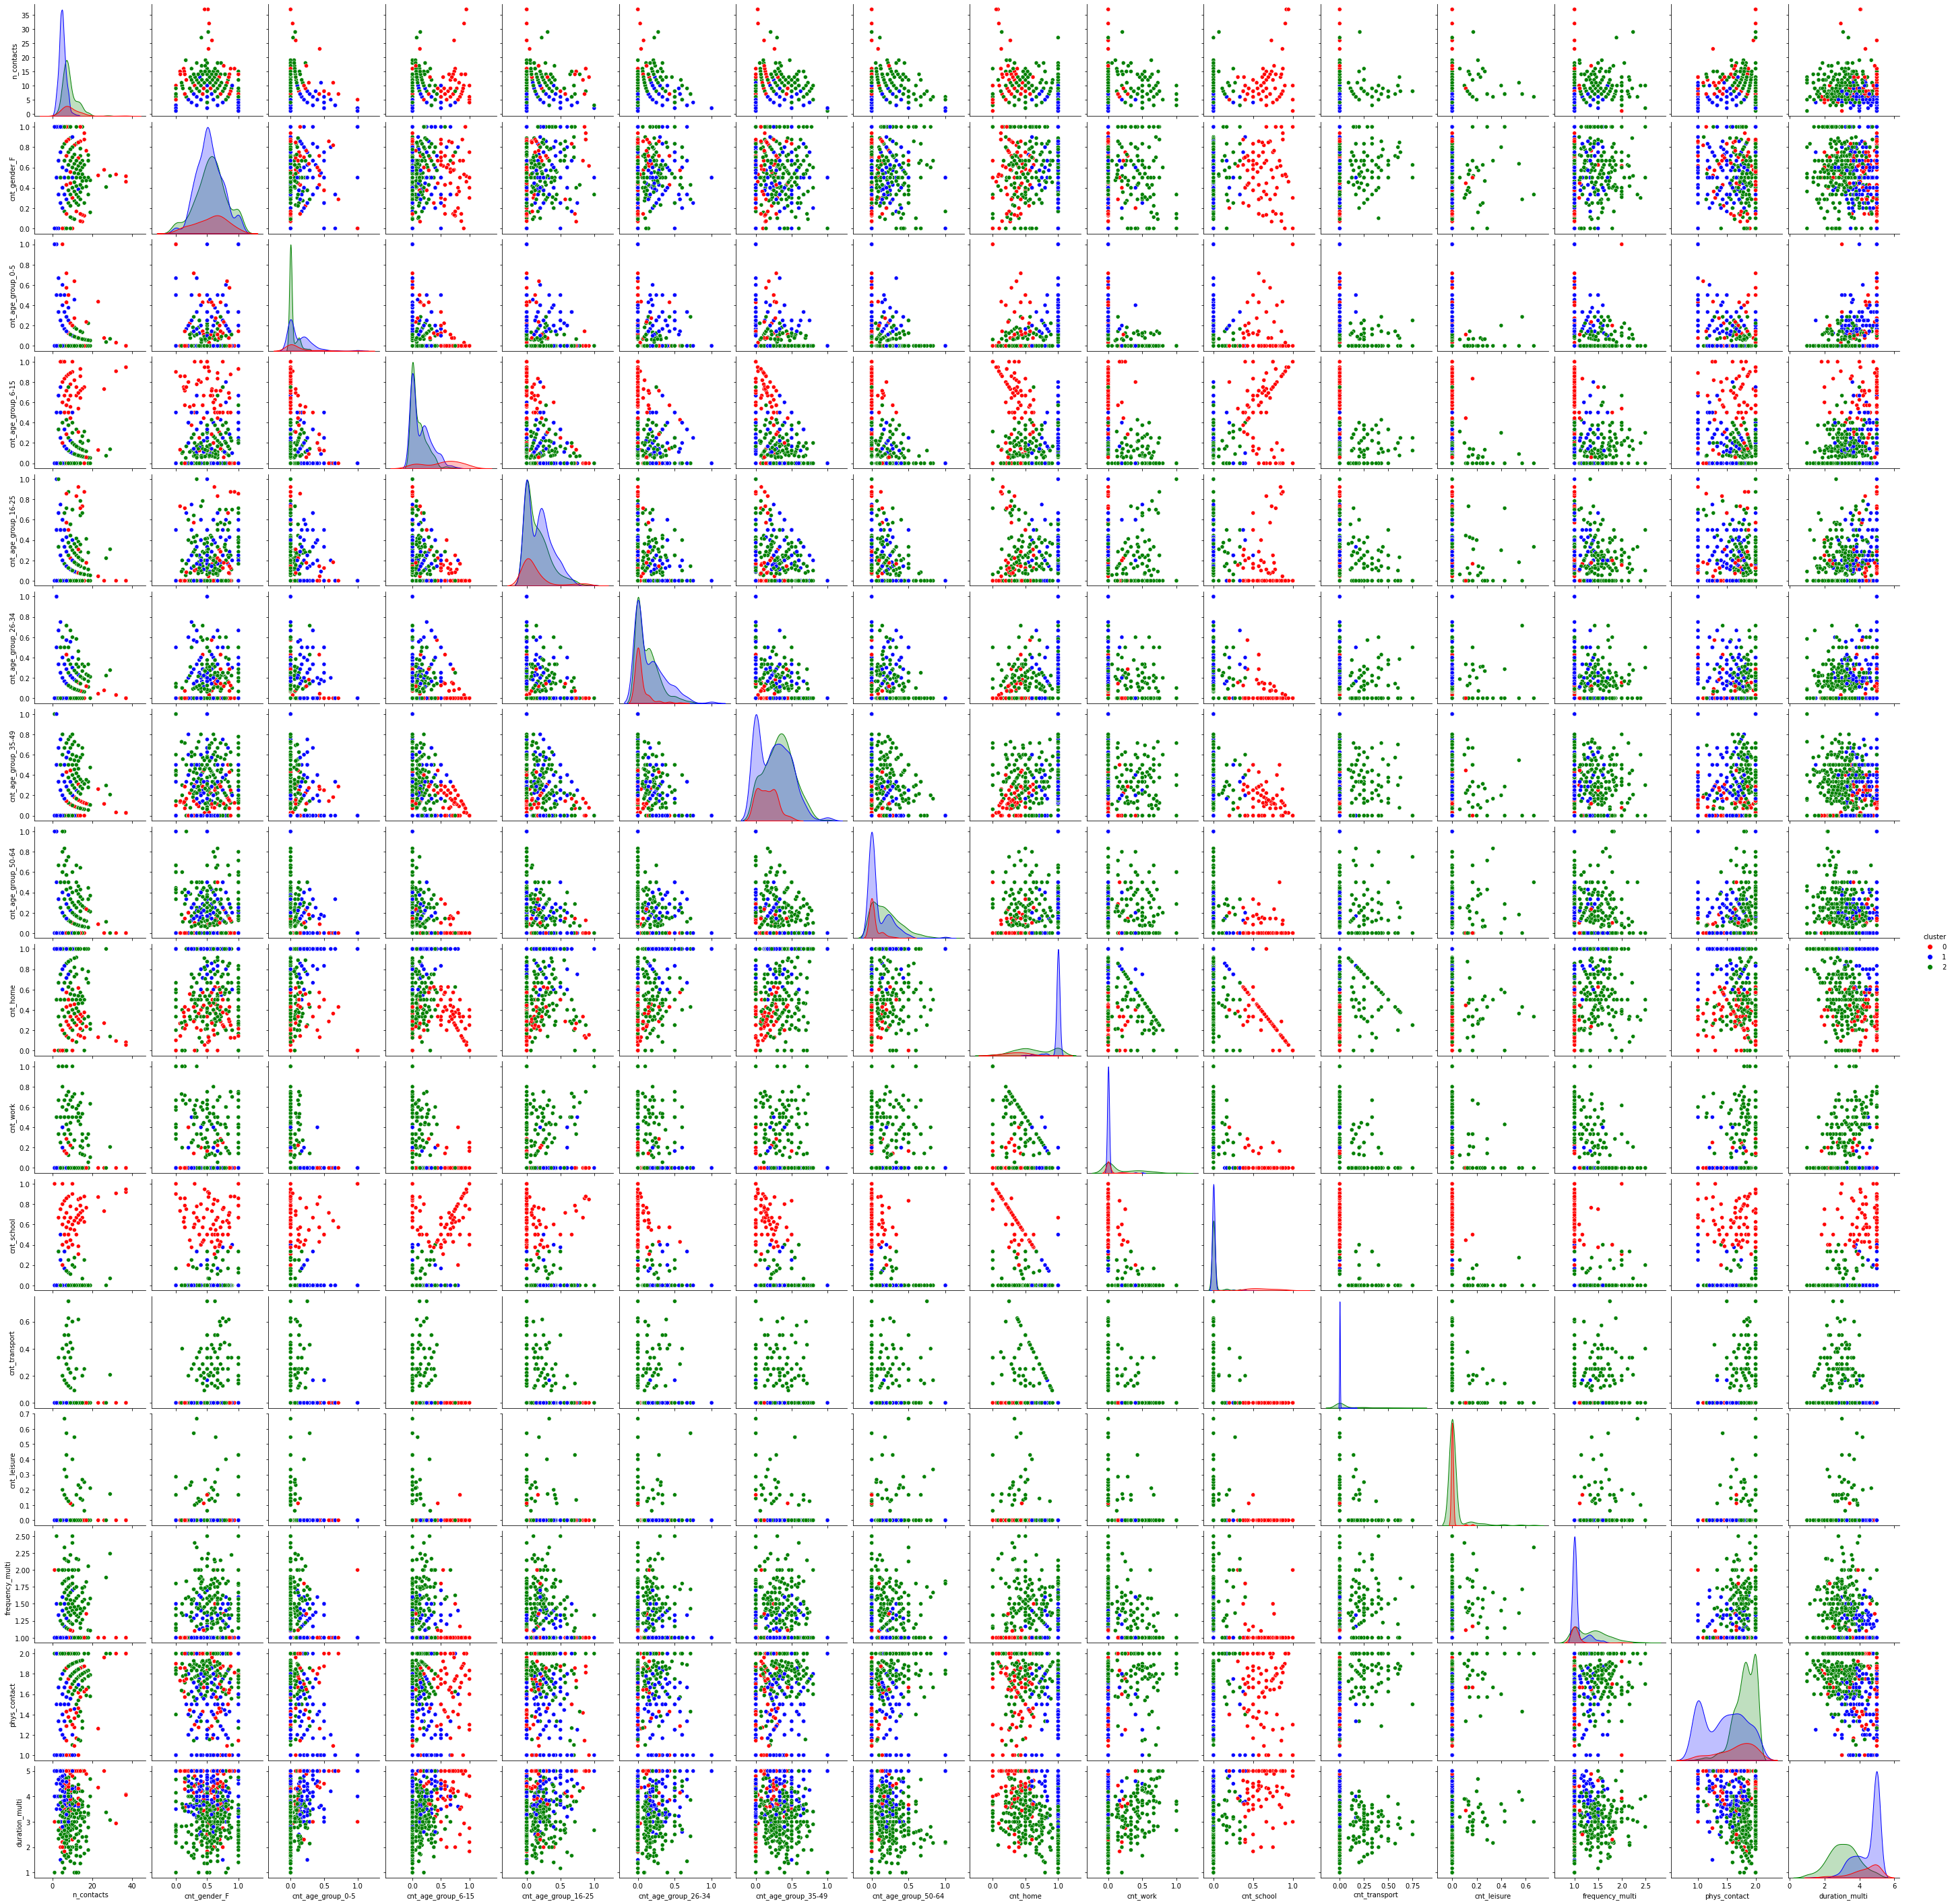

In [102]:
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}

sns.pairplot(data_clustered, hue='cluster', palette=cluster_colors)

plt.show()

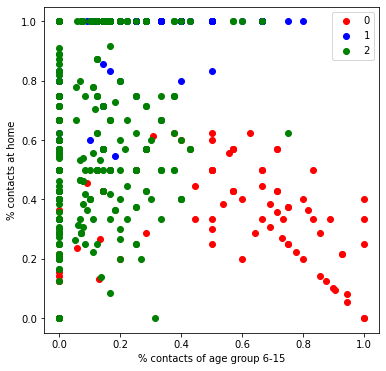

In [103]:
scatter = plt.figure(figsize=(6, 6))

legend_handles = []
legend_labels = []

for cluster_value in cluster_colors:
    cluster_data = final_df.loc[final_df.cluster == cluster_value]
    scatter = plt.scatter(cluster_data['cnt_age_group_6-15'], cluster_data['cnt_home'], c=cluster_colors[cluster_value])
    legend_handles.append(scatter)
    legend_labels.append(cluster_value)

plt.xlabel('% contacts of age group 6-15')
plt.ylabel('% contacts at home')

plt.legend(handles=legend_handles, labels=legend_labels)

plt.show()

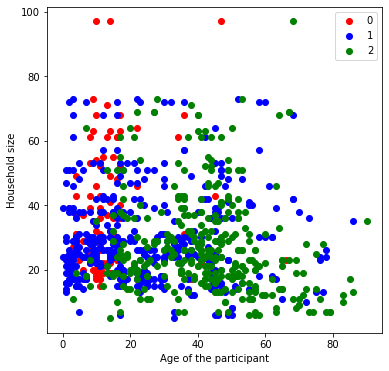

In [104]:
scatter = plt.figure(figsize=(6, 6))

legend_handles = []
legend_labels = []

for cluster_value in cluster_colors:
    cluster_data = final_df.loc[final_df.cluster == cluster_value]
    scatter = plt.scatter(cluster_data['part_age'], cluster_data['hh_size'], c=cluster_colors[cluster_value])
    legend_handles.append(scatter)
    legend_labels.append(cluster_value)

plt.xlabel('Age of the participant')
plt.ylabel('Household size')

plt.legend(handles=legend_handles, labels=legend_labels)

plt.show()

Cluster 0 should represent people in school age having a lot of contacts at school.
Cluster 2 should represent people in work age having a lot of contacts at work and in the place of leisure.
Cluster 1 represents people having almost only contacts at home.